### DEMAPP02 
# Approximating functions on $R^2$

This notebook illustrates how to use CompEcon Toolbox routines to construct and operate with an approximant for a function defined on a rectangle in $R^2$.

In particular, we construct an approximant for $f(x_1,x_2) = \frac{\cos(x_1)}{\exp(x_2)}$ on $[-1,1]\times[-1,1]$.  The function used in this illustration posseses a closed-form, which will allow us to measure approximation error precisely. Of course, in practical applications, the function to be approximated will not possess a known closed-form.

In order to carry out the exercise, one must first code the function to be approximated at arbitrary points.
Let's begin:

In [1]:
from demos.setup import np, plt, demo
from compecon import BasisChebyshev, BasisSpline, nodeunif
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

### Preliminary tasks

Function to be approximated

In [2]:
f = lambda x: np.sin(x[0]) / np.exp(x[1])

Set the points of approximation interval:

In [3]:
a = -1  # left points
b =  1  # right points

Choose an approximation scheme. In this case, let us use an 11 by 11 Chebychev approximation scheme:

In [4]:
n = 11  # order of approximation
basis = BasisChebyshev([n, n], a, b)  
# write n twice to indicate the two dimensions. 
# a and b are broadcast.

### Compute the basis coefficients c.  

There are various way to do this:

* One may compute the standard approximation nodes `x` and corresponding interpolation matrix `Phi` and function values `y` and use:

In [5]:
x = basis.nodes
Phi = basis.Phi(x)  # input x may be omitted if evaluating at the basis nodes
y = f(x)
c = np.linalg.solve(Phi, y)

* Alternatively, one may compute the standard approximation nodes `x` and corresponding function values `y` and use these values to create a `BasisChebyshev` object with keyword argument `y`:

In [6]:
x = basis.nodes
y = f(x)
fa = BasisChebyshev([n, n], a, b, y=y)
# coefficients can be retrieved by typing fa.c

* ... or one may simply pass the function directly to BasisChebyshev using keyword `f`, which by default will evaluate it at the basis nodes

In [7]:
F = BasisChebyshev([n, n], a, b, f=f)
# coefficients can be retrieved by typing F.c

### Evaluate the basis

Having created a `BasisChebyshev` object, one may now evaluate the approximant at any point `x` by calling the object:

In [8]:
x = np.zeros([2, 1])  # first dimension should match the basis dimension
y = F(x)

ff = '%4.0f  %20.15f\n'
print('The exact and approximate value of f at x=[0 0] are')
print(ff % (0, y))

The exact and approximate value of f at x=[0 0] are
   0     0.000000000000000



... one may also evaluate the approximant's first partial derivatives at `x`:

In [9]:
d1 = F(x, [1, 0])
d2 = F(x, [0, 1])
print('The exact and approximate partial derivatives of f w.r.t. x1 at x=[0 0] are')
print(ff % (1, d1))
print('The exact and approximate partial derivatives of f w.r.t. x2 at x=[0 0] are')
print(ff % (0, d2))

The exact and approximate partial derivatives of f w.r.t. x1 at x=[0 0] are
   1     0.999999999735596

The exact and approximate partial derivatives of f w.r.t. x2 at x=[0 0] are
   0     0.000000000000004



... one may also evaluate the approximant's second own partial and cross partial derivatives at `x`:

In [10]:
d11 = F(x, [2, 0])
d22 = F(x, [0, 2])
d12 = F(x, [1, 1])
print('The exact and approximate second partial derivatives of f w.r.t. x1 at x=[0 0] is')
print(ff % (0, d11))
print('The exact and approximate second partial derivatives of f w.r.t. x2 at x=[0 0] is')
print(ff % (0, d22))
print('The exact and approximate second cross partial derivatives of f at x=[0 0] is')
print(ff % (-1, d12))

The exact and approximate second partial derivatives of f w.r.t. x1 at x=[0 0] is
   0     0.000000000000035

The exact and approximate second partial derivatives of f w.r.t. x2 at x=[0 0] is
   0    -0.000000000000022

The exact and approximate second cross partial derivatives of f at x=[0 0] is
  -1    -1.000000000009494



### Approximation accuracy

One may evaluate the accuracy of the Chebychev polynomial approximant by computing the  approximation error on a highly refined grid of points:

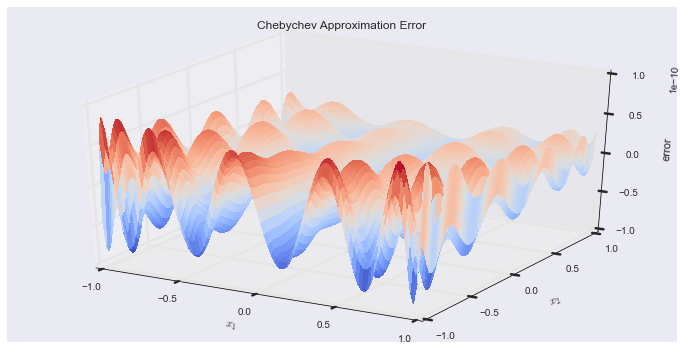

In [11]:
nplot = [101, 101]         # chose grid discretization
X = nodeunif(nplot, [a, a], [b, b])  # generate refined grid for plotting
yapp = F(X)        # approximant values at grid nodes
yact = f(X)                      # actual function values at grid points
error = (yapp - yact).reshape(nplot)
X1, X2 = X
X1.shape = nplot
X2.shape = nplot

fig = plt.figure(figsize=[12, 6])
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X1, X2, error, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('error')
plt.title('Chebychev Approximation Error')

The plot indicates that an order 11 by 11 Chebychev approximation scheme produces approximation errors no bigger in magnitude than $10^{-10}$.

Let us repeat the approximation exercise, this time constructing an order 21 by 21 cubic spline approximation scheme:

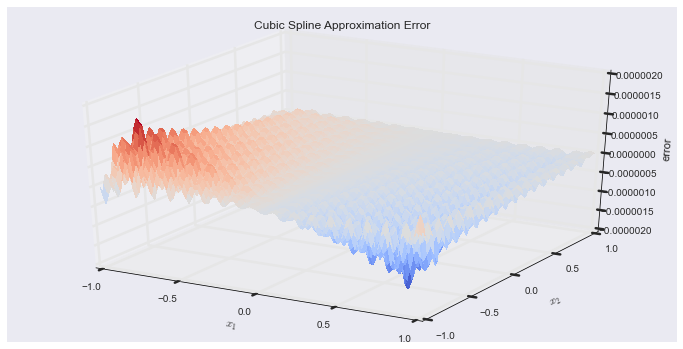

In [12]:
n = [21, 21]                          # order of approximation
S = BasisSpline(n, a, b, f=f)
yapp = S(X)        # approximant values at grid nodes
error = (yapp - yact).reshape(nplot)
fig = plt.figure(figsize=[12, 6])
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X1, X2, error, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('error')
plt.title('Cubic Spline Approximation Error')

The plot indicates that an order 21 by 21 cubic spline approximation scheme produces approximation errors no bigger in magnitude than $10^{-6}$.